In [2]:
# import library
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
from shapely.geometry.polygon import Polygon

## Add Path

In [ ]:
OUTPUT_RELATIVE_PATH = '../../data/'

def create_path():
    """
     This function aims to create path
     """
    path = ["curated/ors-data", "raw/ors-data",
            'curated/model-data', 'raw/model-data']
    for target_dir in path:
        if not os.path.exists(OUTPUT_RELATIVE_PATH + target_dir):
            os.makedirs(OUTPUT_RELATIVE_PATH + target_dir)
        print('Already Create Paths')
    
create_path()

Already Create Paths
Already Create Paths
Already Create Paths
Already Create Paths


## Download all preprocessing Data

In [ ]:
# change directory
import os

os.chdir('../../scripts/preprocessing/')

In [ ]:
# download pre-external data
from domain_preprocessing import *

domain_preprocessing()

Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


22/09/30 23:03:02 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
22/09/30 23:03:04 WARN Utils: Service 'SparkUI' could not bind on port 4040. Attempting port 4041.


()

In [ ]:
from external_preprocessing import *

preprocessing.preprocessing_all()

In [ ]:
from external_preprocessing import *

school_output()

## Join all external features

In [ ]:
from join import *

external_features()

## External-features-preprocessing

In [11]:
# read data
external_features = pd.read_csv('../../data/curated/external-data/external-feature.csv')
internal_features = pd.read_csv('../../data/curated/domain-website-data/domain_preprocessed.csv')

In [12]:
external_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   postcode            180 non-null    int64  
 1   public_duration     130 non-null    float64
 2   care_duration       180 non-null    float64
 3   shopping_duration   88 non-null     float64
 4   station_duration    107 non-null    float64
 5   hospital_duration   95 non-null     float64
 6   CBD_duration        180 non-null    float64
 7   1-10_x              72 non-null     float64
 8   11-50_x             72 non-null     float64
 9   51-100_x            72 non-null     float64
 10  101-150_x           72 non-null     float64
 11  150+_x              72 non-null     float64
 12  1-10_y              155 non-null    float64
 13  11-50_y             155 non-null    float64
 14  51-100_y            155 non-null    float64
 15  101-150_y           155 non-null    float64
 16  150+_y  

In [13]:
external_features

,postcode,public_duration,care_duration,shopping_duration,station_duration,hospital_duration,CBD_duration,1-10_x,11-50_x,51-100_x,...,1-10_y,11-50_y,51-100_y,101-150_y,150+_y,property_count,elector_count,emergency_duration,crime_rate,income
0,3131,258.47,63.46,280.66,185.57,247.6,1638.6,NaN,NaN,NaN,...,0.0,0.0,0.0,1.0,0.0,9685.0,14758.0,189.6,2704.237919,1202.0
1,3939,899.14,326.22,NaN,NaN,730.7,4765.9,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,2.0,8923.0,12193.0,617.7,3806.322916,770.0
2,3429,408.40,263.03,376.96,325.36,582.8,2653.7,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,4.0,15253.0,27933.0,372.8,4668.504451,1438.0
3,3144,111.39,41.85,288.87,144.09,82.7,986.8,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,5276.0,8317.0,103.6,3284.949982,2047.0
4,3338,561.47,130.73,NaN,NaN,NaN,2552.5,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,2.0,11175.0,18240.0,386.6,4207.418457,1096.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,3003,NaN,294.45,NaN,347.54,NaN,499.0,NaN,NaN,NaN,...,0.0,1.0,0.0,0.0,2.0,3068.0,3265.0,370.0,11034.632221,1219.5
176,3008,87.50,96.34,207.21,230.16,205.6,319.5,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,1.0,6312.0,5355.0,212.8,14582.311375,1219.5
177,3207,342.70,130.39,NaN,NaN,NaN,649.4,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,9251.0,12477.0,151.6,8215.660527,1997.0
178,3032,241.01,181.30,372.40,365.14,194.2,964.1,NaN,NaN,NaN,...,0.0,1.0,0.0,0.0,1.0,13659.0,20396.0,NaN,6239.593353,1512.0


### school preprocessing
    - assumption: NaN value means there is no school wirh rank at this level
    - fill 0 with NaN value

In [14]:
pri_school_features = ['1-10_x', '11-50_x', '51-100_x', '101-150_x', '150+_x']
sec_school_features = ['1-10_y', '11-50_y', '51-100_y', '101-150_y', '150+_y']

for col in sec_school_features + pri_school_features:
    external_features[col].fillna(value = 0, inplace=True)

In [15]:
external_features

,postcode,public_duration,care_duration,shopping_duration,station_duration,hospital_duration,CBD_duration,1-10_x,11-50_x,51-100_x,...,1-10_y,11-50_y,51-100_y,101-150_y,150+_y,property_count,elector_count,emergency_duration,crime_rate,income
0,3131,258.47,63.46,280.66,185.57,247.6,1638.6,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,9685.0,14758.0,189.6,2704.237919,1202.0
1,3939,899.14,326.22,NaN,NaN,730.7,4765.9,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,8923.0,12193.0,617.7,3806.322916,770.0
2,3429,408.40,263.03,376.96,325.36,582.8,2653.7,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,4.0,15253.0,27933.0,372.8,4668.504451,1438.0
3,3144,111.39,41.85,288.87,144.09,82.7,986.8,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,5276.0,8317.0,103.6,3284.949982,2047.0
4,3338,561.47,130.73,NaN,NaN,NaN,2552.5,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,11175.0,18240.0,386.6,4207.418457,1096.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,3003,NaN,294.45,NaN,347.54,NaN,499.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,2.0,3068.0,3265.0,370.0,11034.632221,1219.5
176,3008,87.50,96.34,207.21,230.16,205.6,319.5,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,6312.0,5355.0,212.8,14582.311375,1219.5
177,3207,342.70,130.39,NaN,NaN,NaN,649.4,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,9251.0,12477.0,151.6,8215.660527,1997.0
178,3032,241.01,181.30,372.40,365.14,194.2,964.1,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,13659.0,20396.0,NaN,6239.593353,1512.0


<AxesSubplot:>

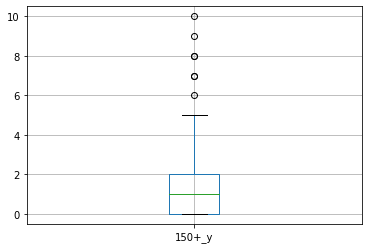

In [16]:
external_features.boxplot(column=['150+_y'])  

### crime rate preprocessing
    - fill median with NaN value

In [17]:
external_features['crime_rate'] = external_features['crime_rate'].fillna(external_features['crime_rate'].median())

### duration preprocessing
    - assumption: if the postcode have null value in these duration feature represent a long distance between the property and those facilities
    - covert the unit of durations from seconds to minutes
    - fill max value with NaN value

In [18]:
# convert seconds to minutes
def sec_to_min(lst_of_col, df):
    for col in lst_of_col:
        df[col] = df[col] / 60
    return

durations = ['public_duration', 'care_duration', 'shopping_duration', 'station_duration', 'hospital_duration', 
            'CBD_duration', 'emergency_duration']
sec_to_min(durations, external_features)

In [19]:
# fill with max value
# categorise the duration features
def fill_in_duration(lst_col, df):
    for col in lst_col:
        df[col] = df[col].fillna(max(df[col]))
    return

fill_in_duration(durations, external_features)

In [20]:
# rename columns
column_names_rename_external = ['postcode', 'public-service-duration', 'care-facility-duration', 'shopping-center-duration',
                                'train-station-duration', 'hospital-duration', 'CBD-duration', 'pri-1-10', 
                                'pri-11-50', 'pri-51-100', 'pri-101-150', 'pri-150+',
                                'sec-1-10', 'sec-11-50', 'sec-51-100', 'sec-101-150', 
                                'sec-150+', 'property-count', 'elector-count', 'emergency-service-duration',
                                'crime-rate', 'income']

external_features.set_axis(column_names_rename_external, axis = 'columns', inplace=True)

In [22]:
# selected new columns
column_names_select_external = ['postcode', 'public-service-duration', 'care-facility-duration', 'shopping-center-duration',
                                'train-station-duration', 'hospital-duration', 'CBD-duration', 'emergency-service-duration', 
                                'property-count', 'elector-count', 'crime-rate', 'income',
                                'pri-1-10', 'pri-11-50', 'pri-51-100', 'pri-101-150', 
                                'pri-150+', 'sec-1-10', 'sec-11-50', 'sec-51-100', 
                                'sec-101-150', 'sec-150+']

external_features_preprocessed = external_features[column_names_select_external]
external_features_preprocessed.to_csv("../../data/curated/model-data/external-features.csv")

## Internal-features-preprocessing

Specification
  - Price
  - Bedrooms
  - Bathrooms
  - Parking
  - Property_type
  - Postcode_property_count
  - coordinates

In [10]:
internal_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12127 entries, 0 to 12126
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               12127 non-null  int64  
 1   property_id              12127 non-null  int64  
 2   street                   12127 non-null  object 
 3   suburb                   12127 non-null  object 
 4   postcode                 12127 non-null  int64  
 5   latitude                 12127 non-null  float64
 6   longitude                12127 non-null  float64
 7   price                    12127 non-null  object 
 8   bedrooms                 12127 non-null  int64  
 9   bathrooms                12127 non-null  int64  
 10  parking                  12127 non-null  int64  
 11  property_type            12127 non-null  object 
 12  url                      12127 non-null  object 
 13  price_rent               12127 non-null  float64
 14  coordinate            

In [11]:
# selected columns
column_names_select_internal = ['postcode', 'street', 'suburb', 'latitude', 
                                'longitude', 'bedrooms', 'bathrooms', 'parking', 
                                'property_type', 'price_rent', 'postcode_property_count']

internal_features = internal_features[column_names_select_internal]

In [12]:
# rename columns
column_names_rename_internal = ['postcode', 'street', 'suburb', 'latitude', 
                                'longitude', 'bedrooms', 'bathrooms', 'parking',
                                'property_type', 'price', 'postcode_property_count']

internal_features_preprocessed = internal_features.set_axis(column_names_rename_internal, axis = 'columns')
internal_features_preprocessed

,postcode,street,suburb,latitude,longitude,bedrooms,bathrooms,parking,property_type,price,postcode_property_count
0,3029,33 cindia crescent,TARNEIT,-37.836800,144.681992,3,2,2,House,410.0,264
1,3029,3 loire close,HOPPERS CROSSING,-37.858776,144.670990,4,2,2,House,420.0,264
2,3029,5 toscana,TRUGANINA,-37.831726,144.721200,4,2,2,New House & Land,440.0,264
3,3029,12 sussex court,TARNEIT,-37.850758,144.712234,3,3,1,House,415.0,264
4,3029,4a craig close,TRUGANINA,-37.843980,144.717514,3,2,1,House,410.0,264
...,...,...,...,...,...,...,...,...,...,...,...
12122,3934,15/26 green island avenue,MOUNT MARTHA,-38.248100,145.041611,3,2,2,Townhouse,625.0,13
12123,3934,8 raymond street,MOUNT MARTHA,-38.285440,144.995331,4,2,2,House,720.0,13
12124,3934,15 whitsunday ct,MOUNT MARTHA,-38.250070,145.052078,4,2,2,House,700.0,13
12125,3934,107 forest dr,MOUNT MARTHA,-38.290226,145.016418,3,2,2,House,870.0,13


## Join external and internal features

In [13]:
# join internal features with external features
features_df = pd.merge(internal_features_preprocessed, external_features_preprocessed, on='postcode', how='outer')

## Merge with population

In [14]:
df_population_growth_rate = pd.read_csv("../../data/raw/external-data/population_growth.csv")

# read shapefile
df_shape = pd.DataFrame(gpd.read_file("../../data/external-raw-data/SA2_2021_AUST_SHP_GDA2020 2/SA2_2021_AUST_GDA2020.shp"))

In [15]:
df_shape = df_shape.dropna().reset_index()
features_df["SA2_code"] = ""

# add SA2 region code for each property
for i in range(len(features_df)):
    property_location = Point(features_df['longitude'].iloc[i], features_df['latitude'].iloc[i])
    code = df_shape.loc[df_shape["geometry"].apply(lambda x: x.contains(property_location))]["SA2_CODE21"]
    code = int(code.values[0])
    features_df.loc[i, "SA2_code"]=code

In [16]:
# join growth rate and external feature data by SA2 code
df = features_df.merge(df_population_growth_rate, left_on='SA2_code', right_on='SA2', how='left')

In [17]:
# drop usedless columns
df = df.drop(['Unnamed: 0', 'SA2', 'Area Name','SA2_code'], axis=1)

In [18]:
# fill null value with median of population growth rate
df['population_growth_rate_2021-2031'] = df['population_growth_rate_2021-2031'].fillna(df['population_growth_rate_2021-2031'].median())

In [19]:
df['street'] = df['street'].astype("string")
df['suburb'] = df['suburb'].astype("string")
df['property_type'] = df['property_type'].astype("string")

In [26]:
df = df.rename({'population_growth_rate_2021-2031' : 'population-growth-rate'}, axis=1)

In [28]:
df.to_csv("../../data/curated/model-data/model-data.csv")